# 1. Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sn

In [2]:
train = pd.read_csv('Data/train.csv', low_memory=False) #for data exploration
dataTrain = train.copy()
train.index.name = 'Index'
test = pd.read_csv('Data/test.csv', low_memory=False)
test.index.name = 'Index'
dataTest = test.copy()

# 2. Исследовательский анализ данных

In [3]:
#Exlore the size of the data sets 
print("train shape:", train.shape)
print("test shape:",  test.shape)

train shape: (10886, 12)
test shape: (6493, 9)


In [4]:
#First 5 rows of the train set
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Index,,,,,,,,,,,,
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Variable data type 
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# 3. Инженерия признаков

in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns.

In [7]:
#Create year, month, day, time columns
train['year'] = pd.to_datetime(train['datetime']).apply(lambda x : x.year)
train['month'] = pd.to_datetime(train['datetime']).apply(lambda x : x.month)
train['weekday'] = pd.to_datetime(train['datetime']).apply(lambda x : x.isoweekday())
train['hour'] = pd.to_datetime(train['datetime']).apply(lambda x : x.hour)
#Drop datetime column as no longer needed
train.drop(columns=['datetime'], inplace = True)

In [8]:
#Update season, weather columns to be more explicit
train['season'] = train['season'].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train['weather'] = train['weather'].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [9]:
#Change below columns types to categorical
for col in ["hour","weekday","month","year", "season","weather","holiday","workingday"]:
    train[col] = train[col].astype("category")

In [10]:
#Check if there are any missing values
train.isnull().values.any()

False

# 4. Анализ и ликвидация выбросов

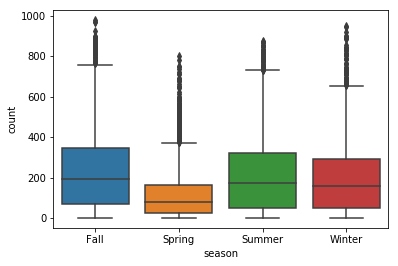

In [11]:
sn.boxplot(x = 'season', y = 'count', data = train) 

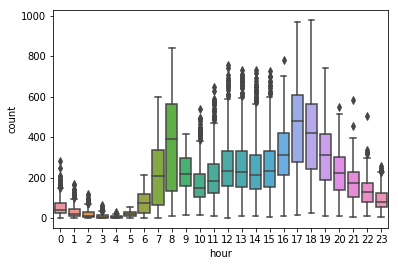

In [12]:
sn.boxplot(x = 'hour', y = 'count', data = train) 

In [13]:
train_outliers_stripped = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]

Удалить выбросы из набора данных с помощью подхода описанного в https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame .

In [14]:
print ("Number of outliers dropped:",len(train)-len(train_outliers_stripped))

Number of outliers dropped: 147


# 5. Тестирование гипотез

In [15]:
hour_distr = train.groupby("hour")['count'].sum()
weather_distr = train.groupby("weather")['count'].sum()
temp_distr = train.groupby("temp")['count'].sum()

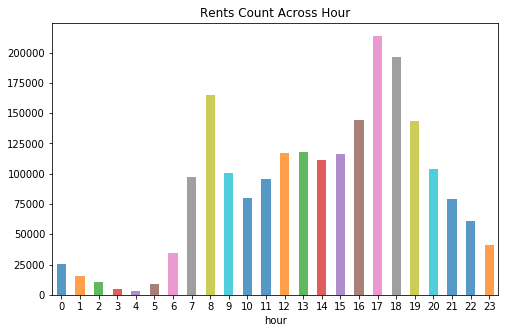

In [16]:
hour_distr.plot(kind="bar", figsize=(8,5),  title="Rents Count Across Hour" , alpha=0.75, rot=0, legend=False)

Из гистограммы видно, что наиболее популярное время для аренды - 7-8 часов утра и 5-7 часов вечера, что подтверждает изначальную гипототезу о "популярности" офисных часов

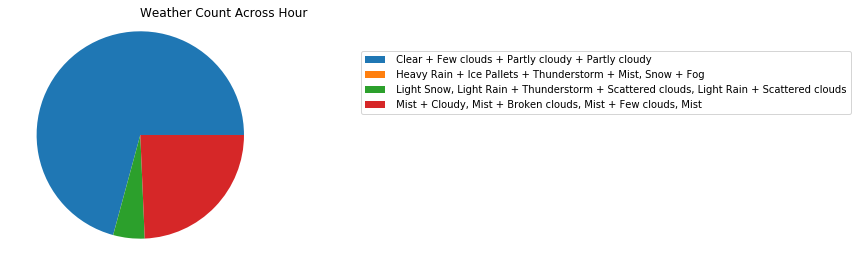

In [17]:
title = plt.title("Weather Count Across Hour")
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(weather_distr, startangle=0)
labels=weather_distr.index
plt.legend(pie[0],labels, bbox_to_anchor=(0.8,0.8), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.6)

Из гистограммы видно, что наиболее популярная погода для аренды - 7-8 часов утра и 5-7 часов вечера, что подтверждает изначальную гипототезу о "популярности" офисных часов

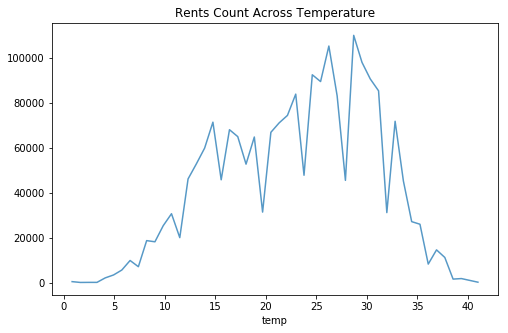

In [18]:
temp_distr.plot(kind="line", figsize=(8,5),  title="Rents Count Across Temperature" , alpha=0.75, legend=False)

Как и предполагалось, при теплой температуре, больше аренд велосипедов. В то же время, спрос снижается при очень холодной/жаркой температуре.

# 6. Анализ корелляции

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


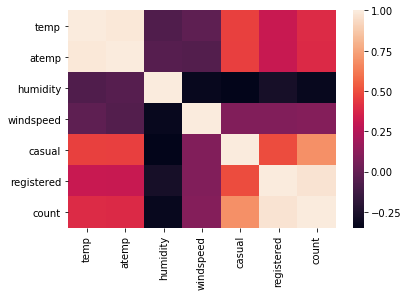

In [19]:
# Additional visualizations
correlations = train[["temp","atemp","humidity","windspeed","casual","registered", "count"]].corr()
display(correlations)
# Produce a heatmap
sn.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns)

Исходя из таблицы корелляции и тепловой карты выше, можно сделать следующие выводы: 
1. Высокая зависимость между переменными temp и atemp, что довольно логично, так как это фактическая и ощущаемая температура это  фактически одно и то же. Впоследствии можно будет удалить одну из этих колонок. 
2. Переменные registered и casual можно не рассматривать, так как это излишние данные, впоследствии можно будет эти колонки удалить. 
3. Переменная temp позивно кореллирует с count (целевой переменной) 
4. Переменная humidity отрицательно кореллирует с count  (целевой переменной) 
5. Исходя из графика переменная windspeed не кореллирует с count  (целевой переменной) 

# 6. Нормализация данных

Если данные как в нашем случае не распределены нормально, особенно если среднее и медианное значения значительно отличаются (обозначая очень значительный скос), обычно уместно применять нелинейное масштабирование. Один из способов - изпользование Box-Cox теста, который рассчитывает лучшее преобразование данных для уменьшения скоса. Более простой подход, который сработает в большинстве случаев, - это применение натурального логарифмирования. 

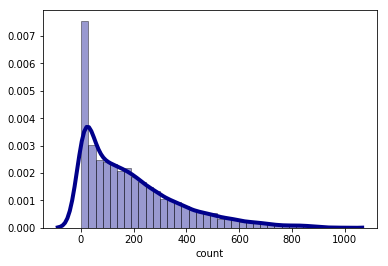

In [20]:
sn.distplot(train["count"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

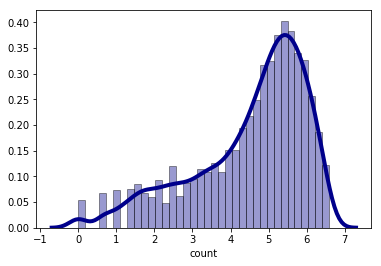

In [21]:
sn.distplot(np.log(train_outliers_stripped["count"]), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# 7. Подготовка данных для обучения

In [22]:
categoricalFeatures = ["hour","weekday","month","year","season","weather","holiday","workingday"]
numericalFeatures = ["atemp", "humidity", "windspeed", "count"]
featuresToBeDropped = ["temp", "registered", "casual", "count"]

In [23]:
frames = [dataTrain, dataTest]
count = dataTrain["count"]
rawData = pd.concat(frames, sort=False)

Split datetime column, transform some columns to categorical

In [24]:
#Create year, month, day, time columns
rawData['year'] = pd.to_datetime(rawData['datetime']).apply(lambda x : x.year)
rawData['month'] = pd.to_datetime(rawData['datetime']).apply(lambda x : x.month)
rawData['weekday'] = pd.to_datetime(rawData['datetime']).apply(lambda x : x.isoweekday())
rawData['hour'] = pd.to_datetime(rawData['datetime']).apply(lambda x : x.hour)
#Drop datetime column as no longer needed
rawData.drop(columns=['datetime'], inplace = True)

In [25]:
for var in categoricalFeatures:
    rawData[var] = rawData[var].astype("category")

In [26]:
rawData.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual         float64
registered     float64
count          float64
year          category
month         category
weekday       category
hour          category
dtype: object

In [27]:
rawData.isnull().values.any()

True

In [28]:
rawData  = rawData.drop(featuresToBeDropped,axis=1)

In [29]:
"""
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

def convert_col_to_dummy_df(df_col):
    col_name = df_col.name
    # Add calculating frequencies of values here...
    dummy_df = pd.get_dummies(df_col, prefix=col_name, prefix_sep=': ')
    dummy_df_cols = {}
    # Add formatting names here...
    return dummy_df

# 5. Encode categorical features
for col_name in rawData.columns:
    col_series = rawData[col_name]
    if col_series.dtype.name == "category":
        print('Applying categorical encoding to %s...' % col_name)
        dummy_rawData = convert_col_to_dummy_df(col_series)
        rawData.drop(col_name, axis=1, inplace=True)
        rawData = pd.concat([rawData, dummy_rawData], axis=1)

# 7. Normalize features
mapper = DataFrameMapper([(rawData.columns, StandardScaler())])
scaled_features = mapper.fit_transform(rawData.copy(), len(rawData.columns))
rawData = pd.DataFrame(scaled_features, index=rawData.index, columns=rawData.columns)
"""

'\nfrom sklearn_pandas import DataFrameMapper\nfrom sklearn.preprocessing import StandardScaler\n\ndef convert_col_to_dummy_df(df_col):\n    col_name = df_col.name\n    # Add calculating frequencies of values here...\n    dummy_df = pd.get_dummies(df_col, prefix=col_name, prefix_sep=\': \')\n    dummy_df_cols = {}\n    # Add formatting names here...\n    return dummy_df\n\n# 5. Encode categorical features\nfor col_name in rawData.columns:\n    col_series = rawData[col_name]\n    if col_series.dtype.name == "category":\n        print(\'Applying categorical encoding to %s...\' % col_name)\n        dummy_rawData = convert_col_to_dummy_df(col_series)\n        rawData.drop(col_name, axis=1, inplace=True)\n        rawData = pd.concat([rawData, dummy_rawData], axis=1)\n\n# 7. Normalize features\nmapper = DataFrameMapper([(rawData.columns, StandardScaler())])\nscaled_features = mapper.fit_transform(rawData.copy(), len(rawData.columns))\nrawData = pd.DataFrame(scaled_features, index=rawData.ind

In [30]:
"""trainFinal = rawData[:10886]
trainFinal = trainFinal.assign(count=count.values)
testFinal = rawData[10886:]"""

'trainFinal = rawData[:10886]\ntrainFinal = trainFinal.assign(count=count.values)\ntestFinal = rawData[10886:]'

In [31]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainFinal, trainFinal["count"], test_size=0.33, random_state=42)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(trainFinal, trainFinal["count"], test_size=0.33, random_state=42)'

In [32]:
"""from lightgbm import LGBMClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier"""

'from lightgbm import LGBMClassifier\nfrom sklearn import linear_model\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier'

In [33]:
"""lgbm_clf = LGBMClassifier(
    random_state=2018
)"""

'lgbm_clf = LGBMClassifier(\n    random_state=2018\n)'

In [34]:
#lgbm_clf.fit(X_train, y_train)

In [35]:
#preds = lgbm_clf.predict(X_train)

In [36]:
"""from sklearn.metrics  import mean_squared_error, mean_absolute_error
mean_squared_error = mean_squared_error(y_test, preds)
mean_absolute_error = mean_absolute_error(y_test, preds)
result = {'mean_squared_error': mean_squared_error, 'mean_absolute_error': mean_absolute_error}"""

"from sklearn.metrics  import mean_squared_error, mean_absolute_error\nmean_squared_error = mean_squared_error(y_test, preds)\nmean_absolute_error = mean_absolute_error(y_test, preds)\nresult = {'mean_squared_error': mean_squared_error, 'mean_absolute_error': mean_absolute_error}"

In [37]:
#result